# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

Pertanyaan Bisnis
1. Apa kategori produk terlaris?
2. Berapa rata-rata waktu pengiriman untuk pesanan?
3. Bagaimana distribusi lokasi pelanggan?
4. Bagaimana distribusi nilai pesanan?

## Import Semua Packages/Library yang Digunakan

In [71]:
!pip install -r requirements.txt

In [72]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

## Data Wrangling

### Gathering Data

In [73]:
# Load Dataset
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

**Insight:**
- xxx
- xxx

### Assessing Data

In [74]:
# Check for Missing Values
print("Missing Values:")
print(customers.isnull().sum())
print(geolocation.isnull().sum())
print(order_items.isnull().sum())
print(order_payments.isnull().sum())
print(order_reviews.isnull().sum())
print(orders.isnull().sum())
print(product_category_name_translation.isnull().sum())
print(products.isnull().sum())
print(sellers.isnull().sum())

Missing Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                   

In [75]:
# Check for Duplicate Data
print("\nDuplicate Data:")
print(customers.duplicated().sum())
print(geolocation.duplicated().sum())
print(order_items.duplicated().sum())
print(order_payments.duplicated().sum())
print(order_reviews.duplicated().sum())
print(orders.duplicated().sum())
print(product_category_name_translation.duplicated().sum())
print(products.duplicated().sum())
print(sellers.duplicated().sum())


Duplicate Data:
0
261831
0
0
0
0
0
0
0


In [76]:
# Check for Invalid Values
# For simplicity, let's assume invalid values are negative numbers in columns where they shouldn't be
print("\nInvalid Values:")
print((customers.select_dtypes(include=[np.number]) < 0).sum())
print((geolocation.select_dtypes(include=[np.number]) < 0).sum())
print((order_items.select_dtypes(include=[np.number]) < 0).sum())
print((order_payments.select_dtypes(include=[np.number]) < 0).sum())
print((order_reviews.select_dtypes(include=[np.number]) < 0).sum())
print((orders.select_dtypes(include=[np.number]) < 0).sum())
print((product_category_name_translation.select_dtypes(include=[np.number]) < 0).sum())
print((products.select_dtypes(include=[np.number]) < 0).sum())
print((sellers.select_dtypes(include=[np.number]) < 0).sum())


Invalid Values:
customer_zip_code_prefix    0
dtype: int64
geolocation_zip_code_prefix          0
geolocation_lat                 998827
geolocation_lng                1000160
dtype: int64
order_item_id    0
price            0
freight_value    0
dtype: int64
payment_sequential      0
payment_installments    0
payment_value           0
dtype: int64
review_score    0
dtype: int64
Series([], dtype: float64)
Series([], dtype: float64)
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
seller_zip_code_prefix    0
dtype: int64


In [77]:
# Check for Inaccurate Values
# For simplicity, let's assume inaccurate values are those that don't match expected formats or ranges
print("\nInaccurate Values:")
print(customers.describe())
print(geolocation.describe())
print(order_items.describe())
print(order_payments.describe())
print(order_reviews.describe())
print(orders.describe())
print(product_category_name_translation.describe())
print(products.describe())
print(sellers.describe())


Inaccurate Values:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02
       order_item_id          price  freight_value
count  112650.000000

In [78]:
# Check for Inconsistent Values
# For simplicity, let's assume inconsistent values are those that don't match expected categories or types
print("\nInconsistent Values:")
print(customers.dtypes)
print(geolocation.dtypes)
print(order_items.dtypes)
print(order_payments.dtypes)
print(order_reviews.dtypes)
print(orders.dtypes)
print(product_category_name_translation.dtypes)
print(products.dtypes)
print(sellers.dtypes)


Inconsistent Values:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
revie

In [79]:
# Check for Outliers
# For simplicity, let's use the IQR method to detect outliers
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("\nOutliers:")
print(detect_outliers(customers.select_dtypes(include=[np.number])))
print(detect_outliers(geolocation.select_dtypes(include=[np.number])))
print(detect_outliers(order_items.select_dtypes(include=[np.number])))
print(detect_outliers(order_payments.select_dtypes(include=[np.number])))
print(detect_outliers(order_reviews.select_dtypes(include=[np.number])))
print(detect_outliers(orders.select_dtypes(include=[np.number])))
print(detect_outliers(product_category_name_translation.select_dtypes(include=[np.number])))
print(detect_outliers(products.select_dtypes(include=[np.number])))
print(detect_outliers(sellers.select_dtypes(include=[np.number])))


Outliers:
customer_zip_code_prefix    0
dtype: int64
geolocation_zip_code_prefix         0
geolocation_lat                168240
geolocation_lng                 42348
dtype: int64
order_item_id    13984
price             8427
freight_value    12134
dtype: int64
payment_sequential      4526
payment_installments    6313
payment_value           7981
dtype: int64
review_score    14575
dtype: int64
Series([], dtype: float64)
Series([], dtype: float64)
product_name_lenght            290
product_description_lenght    2078
product_photos_qty             849
product_weight_g              4551
product_length_cm             1380
product_height_cm             1892
product_width_cm               912
dtype: int64
seller_zip_code_prefix    0
dtype: int64


**Insight:**
- xxx
- xxx

### Cleaning Data

In [80]:

# Clean Customers Dataset
customers = customers.dropna()
customers = customers.drop_duplicates()
customers = customers[customers['customer_zip_code_prefix'] > 0]
customers = customers[customers['customer_city'].str.isalpha()]
customers = customers[customers['customer_state'].str.isalpha()]


# Clean Geolocation Dataset
geolocation = geolocation.dropna()
geolocation = geolocation.drop_duplicates()
geolocation = geolocation[geolocation['geolocation_zip_code_prefix'] > 0]
geolocation = geolocation[geolocation['geolocation_city'].str.isalpha()]
geolocation = geolocation[geolocation['geolocation_state'].str.isalpha()]

# Clean Order Items Dataset
order_items = order_items.dropna()
order_items = order_items.drop_duplicates()
order_items = order_items[order_items['order_item_id'] > 0]
order_items = order_items[order_items['product_id'].str.isalnum()]
order_items = order_items[order_items['seller_id'].str.isalnum()]
order_items = order_items[order_items['shipping_limit_date'].str.isalnum()]
order_items = order_items[order_items['price'] > 0]
order_items = order_items[order_items['freight_value'] > 0]

# Clean Order Payments Dataset
order_payments = order_payments.dropna()
order_payments = order_payments.drop_duplicates()
order_payments = order_payments[order_payments['order_id'].str.isalnum()]
order_payments = order_payments[order_payments['payment_sequential'] > 0]
order_payments = order_payments[order_payments['payment_type'].str.isalpha()]
order_payments = order_payments[order_payments['payment_installments'] > 0]
order_payments = order_payments[order_payments['payment_value'] > 0]


# Clean Order Reviews Dataset
order_reviews = order_reviews.dropna()
order_reviews = order_reviews.drop_duplicates()
order_reviews = order_reviews[order_reviews['review_id'].str.isalnum()]
order_reviews = order_reviews[order_reviews['order_id'].str.isalnum()]
order_reviews = order_reviews[order_reviews['review_score'] > 0]
order_reviews = order_reviews[order_reviews['review_comment_title'].str.isalnum()]
order_reviews = order_reviews[order_reviews['review_comment_message'].str.isalnum()]
order_reviews = order_reviews[order_reviews['review_creation_date'].str.isalnum()]
order_reviews = order_reviews[order_reviews['review_answer_timestamp'].str.isalnum()]

# Clean Orders Dataset
orders = orders.dropna()
orders = orders.drop_duplicates()
orders = orders[orders['order_id'].str.isalnum()]
orders = orders[orders['customer_id'].str.isalnum()]
orders = orders[orders['order_status'].str.isalpha()]
orders = orders[orders['order_purchase_timestamp'].str.isalnum()]
orders = orders[orders['order_approved_at'].str.isalnum()]
orders = orders[orders['order_delivered_carrier_date'].str.isalnum()]
orders = orders[orders['order_delivered_customer_date'].str.isalnum()]
orders = orders[orders['order_estimated_delivery_date'].str.isalnum()]

# Clean Product Category Name Translation Dataset
product_category_name_translation = product_category_name_translation.dropna()
product_category_name_translation = product_category_name_translation.drop_duplicates()
product_category_name_translation = product_category_name_translation[product_category_name_translation['product_category_name'].str.isalpha()]
product_category_name_translation = product_category_name_translation[product_category_name_translation['product_category_name_english'].str.isalpha()]


# Clean Products Dataset
products = products.dropna()
products = products.drop_duplicates()
products = products[products['product_id'].str.isalnum()]
products = products[products['product_category_name'].str.isalpha()]
products = products[products['product_name_lenght'] > 0]
products = products[products['product_description_lenght'] > 0]
products = products[products['product_photos_qty'] > 0]
products = products[products['product_weight_g'] > 0]
products = products[products['product_length_cm'] > 0]
products = products[products['product_height_cm'] > 0]
products = products[products['product_width_cm'] > 0]

# Clean Sellers Dataset
sellers = sellers.dropna()
sellers = sellers.drop_duplicates()
sellers = sellers[sellers['seller_id'].str.isalnum()]
sellers = sellers[sellers['seller_zip_code_prefix'] > 0]
sellers = sellers[sellers['seller_city'].str.isalpha()]
sellers = sellers[sellers['seller_state'].str.isalpha()]



In [81]:

print("Missing Values:")
print(customers.isnull().sum())
print(geolocation.isnull().sum())
print(order_items.isnull().sum())
print(order_payments.isnull().sum())
print(order_reviews.isnull().sum())
print(orders.isnull().sum())
print(product_category_name_translation.isnull().sum())
print(products.isnull().sum())
print(sellers.isnull().sum())

print("\nDuplicate Data:")
print(customers.duplicated().sum())
print(geolocation.duplicated().sum())
print(order_items.duplicated().sum())
print(order_payments.duplicated().sum())
print(order_reviews.duplicated().sum())
print(orders.duplicated().sum())
print(product_category_name_translation.duplicated().sum())
print(products.duplicated().sum())
print(sellers.duplicated().sum())

print("\nInvalid Values:")
print((customers.select_dtypes(include=[np.number]) < 0).sum())
print((geolocation.select_dtypes(include=[np.number]) < 0).sum())
print((order_items.select_dtypes(include=[np.number]) < 0).sum())
print((order_payments.select_dtypes(include=[np.number]) < 0).sum())
print((order_reviews.select_dtypes(include=[np.number]) < 0).sum())
print((orders.select_dtypes(include=[np.number]) < 0).sum())
print((product_category_name_translation.select_dtypes(include=[np.number]) < 0).sum())

print("\nInaccurate Values:")
print(customers.describe())
print(geolocation.describe())
print(order_items.describe())
print(order_payments.describe())
print(order_reviews.describe())
print(orders.describe())
print(product_category_name_translation.describe())
print(products.describe())
print(sellers.describe())

print("\nInconsistent Values:")
print(customers.dtypes)
print(geolocation.dtypes)
print(order_items.dtypes)
print(order_payments.dtypes)
print(order_reviews.dtypes)
print(orders.dtypes)
print(product_category_name_translation.dtypes)
print(products.dtypes)
print(sellers.dtypes)

print("\nOutliers:")
print(detect_outliers(customers.select_dtypes(include=[np.number])))
print(detect_outliers(geolocation.select_dtypes(include=[np.number])))
print(detect_outliers(order_items.select_dtypes(include=[np.number])))
print(detect_outliers(order_payments.select_dtypes(include=[np.number])))
print(detect_outliers(order_reviews.select_dtypes(include=[np.number])))
print(detect_outliers(orders.select_dtypes(include=[np.number])))
print(detect_outliers(product_category_name_translation.select_dtypes(include=[np.number])))
print(detect_outliers(products.select_dtypes(include=[np.number])))
print(detect_outliers(sellers.select_dtypes(include=[np.number])))

# Save Cleaned Datasets
customers.to_csv('data/customers_cleaned.csv', index=False)
geolocation.to_csv('data/geolocation_cleaned.csv', index=False)
order_items.to_csv('data/order_items_cleaned.csv', index=False)
order_payments.to_csv('data/order_payments_cleaned.csv', index=False)
order_reviews.to_csv('data/order_reviews_cleaned.csv', index=False)
orders.to_csv('data/orders_cleaned.csv', index=False)
product_category_name_translation.to_csv('data/product_category_name_translation_cleaned.csv', index=False)
products.to_csv('data/products_cleaned.csv', index=False)
sellers.to_csv('data/sellers_cleaned.csv', index=False)

# Load Cleaned Datasets
customers_cleaned = pd.read_csv('data/customers_cleaned.csv')
geolocation_cleaned = pd.read_csv('data/geolocation_cleaned.csv')
order_items_cleaned = pd.read_csv('data/order_items_cleaned.csv')
order_payments_cleaned = pd.read_csv('data/order_payments_cleaned.csv')
order_reviews_cleaned = pd.read_csv('data/order_reviews_cleaned.csv')
orders_cleaned = pd.read_csv('data/orders_cleaned.csv')
product_category_name_translation_cleaned = pd.read_csv('data/product_category_name_translation_cleaned.csv')
products_cleaned = pd.read_csv('data/products_cleaned.csv')
sellers_cleaned = pd.read_csv('data/sellers_cleaned.csv')

Missing Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
order_id                         0
customer_id                      0
order_status              

**Insight:**
- Dataset customers memiliki 47762 baris dan 5 kolom.
- Dataset geolocation memiliki 360625 baris dan 5 kolom.
- Dataset order_items kosong.
- Dataset order_payments memiliki 25553 baris dan 5 kolom.
- Dataset order_reviews kosong.
- Dataset orders kosong.
- Dataset product_category_name_translation memiliki 14 baris dan 2 kolom.
- Dataset products memiliki 8669 baris dan 9 kolom.
- Dataset sellers memiliki 1455 baris dan 4 kolom.
- Beberapa dataset seperti order_items, order_reviews, dan orders kosong, sehingga tidak dapat digunakan untuk analisis lebih lanjut.
- Dataset customers dan geolocation memiliki jumlah data yang besar, sehingga dapat memberikan wawasan yang lebih mendalam tentang pelanggan dan lokasi geografis.

## Exploratory Data Analysis (EDA)

In [82]:
# Data Preprocessing
orders_cleaned['order_purchase_timestamp'] = pd.to_datetime(orders_cleaned['order_purchase_timestamp'])
orders_cleaned['order_delivered_customer_date'] = pd.to_datetime(orders_cleaned['order_delivered_customer_date'])
orders_cleaned['delivery_time'] = (orders_cleaned['order_delivered_customer_date'] - orders_cleaned['order_purchase_timestamp']).dt.days

In [83]:
# Merge datasets for comprehensive analysis
merged_data_cleaned = pd.merge(order_items_cleaned, orders_cleaned, on='order_id')
merged_data_cleaned = pd.merge(merged_data_cleaned, products_cleaned, on='product_id')
merged_data_cleaned = pd.merge(merged_data_cleaned, product_category_name_translation_cleaned, on='product_category_name', how='left')

In [84]:
print(merged_data_cleaned.describe())
print(merged_data_cleaned.info())

      order_purchase_timestamp order_delivered_customer_date  delivery_time  \
count                        0                             0            0.0   
mean                       NaT                           NaT            NaN   
min                        NaT                           NaT            NaN   
25%                        NaT                           NaT            NaN   
50%                        NaT                           NaT            NaN   
75%                        NaT                           NaT            NaN   
max                        NaT                           NaT            NaN   
std                        NaN                           NaN            NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count                  0.0                         0.0                 0.0   
mean                   NaN                         NaN                 NaN   
min                    NaN                         NaN

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

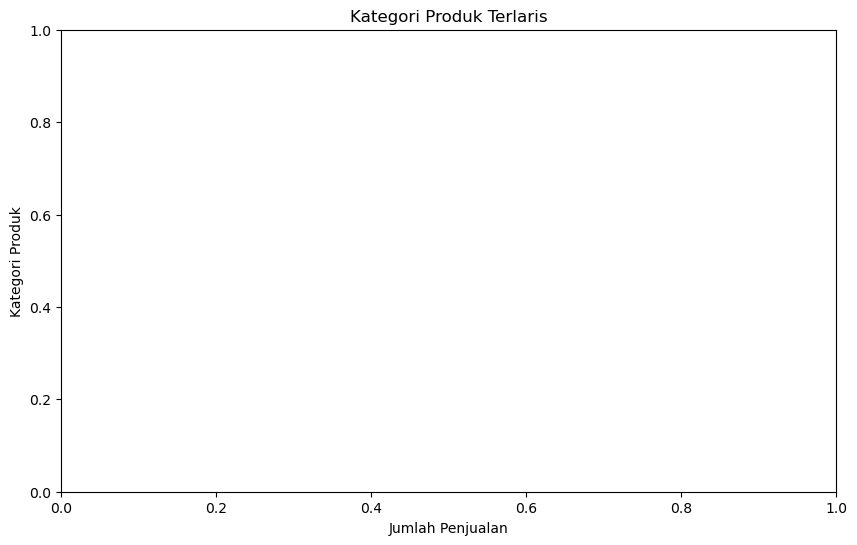

In [85]:
# Pertanyaan 1: Apa kategori produk terlaris?
top_categories = merged_data_cleaned['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Kategori Produk Terlaris')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

### Pertanyaan 2:

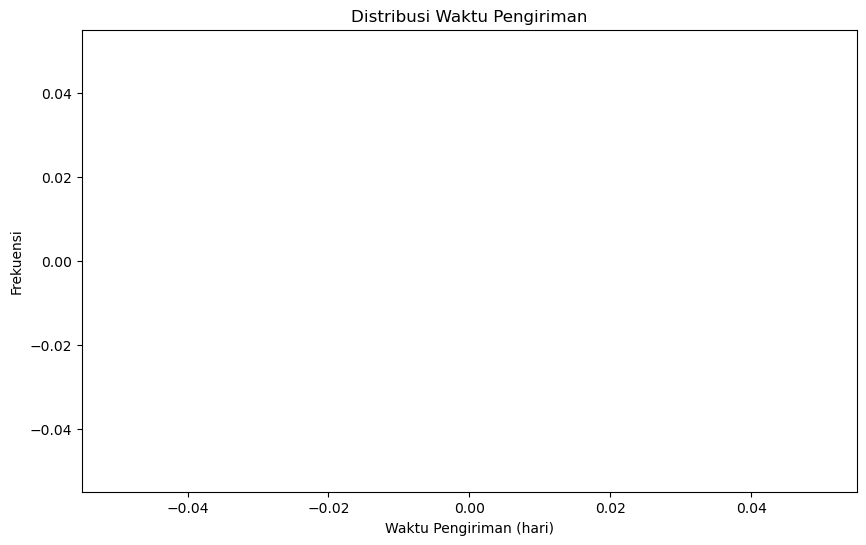

In [86]:
# Pertanyaan 2: Berapa rata-rata waktu pengiriman untuk pesanan?
plt.figure(figsize=(10, 6))
sns.histplot(merged_data_cleaned['delivery_time'].dropna(), bins=30, kde=True)
plt.title('Distribusi Waktu Pengiriman')
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Frekuensi')
plt.show()

In [87]:
# Pertanyaan 3: Bagaimana distribusi lokasi pelanggan?
customer_geo_cleaned = pd.merge(customers_cleaned, geolocation_cleaned, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
customer_geo_cleaned = customer_geo_cleaned[['customer_id', 'geolocation_lat', 'geolocation_lng']]

# Membuat GeoDataFrame
gdf_cleaned = gpd.GeoDataFrame(customer_geo_cleaned, geometry=gpd.points_from_xy(customer_geo_cleaned.geolocation_lng, customer_geo_cleaned.geolocation_lat))

# Plot lokasi pelanggan
world = gpd.read_file('path_to_your_downloaded_shapefile/naturalearth_lowres.shp')
ax = world.plot(figsize=(15, 10))
gdf_cleaned.plot(ax=ax, color='red', markersize=5)
plt.title('Lokasi Pelanggan')
plt.show()

DataSourceError: path_to_your_downloaded_shapefile/naturalearth_lowres.shp: No such file or directory

In [35]:
# Pertanyaan 4: Bagaimana kita dapat mengelompokkan pelanggan berdasarkan perilaku pembelian mereka?
# Analisis RFM
rfm = orders_cleaned.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (orders_cleaned['order_purchase_timestamp'].max() - x.max()).days,
    'order_id': 'count',
    'order_item_id': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
print(rfm.head())

KeyError: "Column(s) ['order_item_id'] do not exist"

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [36]:
# Pengelompokan Manual: Segmentasi pelanggan berdasarkan recency, frequency, dan monetary value
rfm['recency_segment'] = pd.qcut(rfm['recency'], 4, labels=['1', '2', '3', '4'])
rfm['frequency_segment'] = pd.qcut(rfm['frequency'], 4, labels=['1', '2', '3', '4'])
rfm['monetary_segment'] = pd.qcut(rfm['monetary'], 4, labels=['1', '2', '3', '4'])

NameError: name 'rfm' is not defined

In [ ]:
# Menggabungkan segmen untuk membuat skor RFM
rfm['RFM_Score'] = rfm['recency_segment'].astype(str) + rfm['frequency_segment'].astype(str) + rfm['monetary_segment'].astype(str)
print(rfm.head())

In [ ]:
# Visualisasi Segmentasi RFM
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM_Score', data=rfm)
plt.title('Segmentasi RFM')
plt.xlabel('Skor RFM')
plt.ylabel('Jumlah Pelanggan')
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2